<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/StockPrices_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
!wget -O spy.csv https://lazyprogrammer.me/course_files/SPY.csv

--2024-07-15 10:06:35--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘spy.csv’

spy.csv             100%[===================>] 246.03K  1.40MB/s    in 0.2s    

2024-07-15 10:06:36 (1.40 MB/s) - ‘spy.csv’ saved [251935/251935]



In [ ]:
df = pd.read_csv('spy.csv', index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df.shape

(2263, 6)

In [ ]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [ ]:
train[1]

113.62999725341795

We would say that our function is <br> y(t) = y(t-1) + y(t-2). So it depends of past 2 values

In [ ]:
X_train = []
X_test = []

for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t+1]
  X_train.append((x0, x1))

for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t+1]
  X_test.append((x0, x1))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

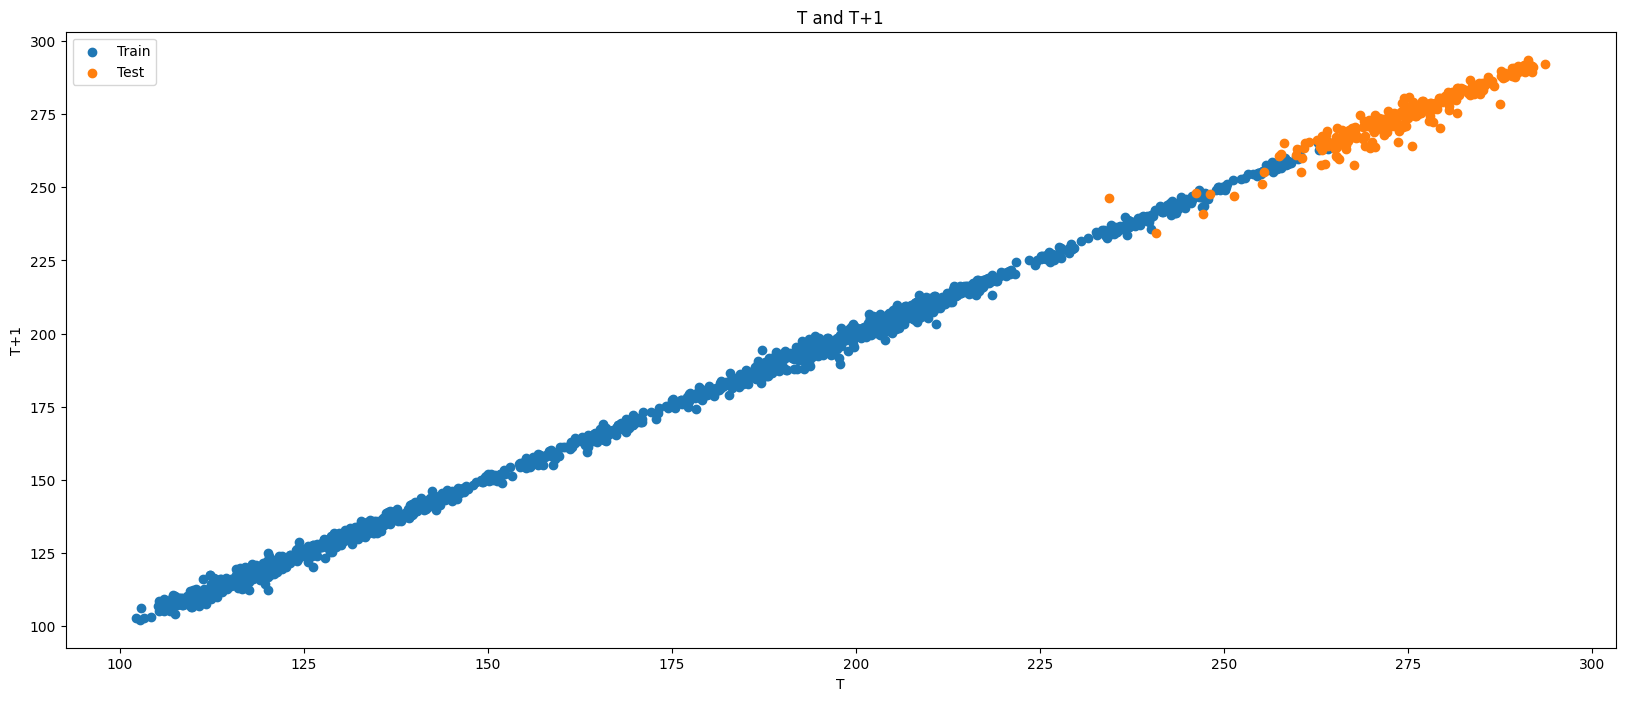

In [ ]:
# Let's plot both of them, t on x axis and t+1 on y axis
plt.figure(figsize=(20,8))
plt.xlabel('T')
plt.ylabel('T+1')
plt.title('T and T+1')
plt.scatter(X_train[:,0], X_train[:,1], label='Train')
plt.scatter(X_test[:,0], X_test[:,1], label='Test')
plt.legend();

As you can see that the train and test data is completely seperated. So if you trained on train data and want to test on test data. So you will need
some kind of <b>extrapolation<b>.
<br>The Min-max Scaling or any other scalar will not work, because if you reduce, you will reduce all and the plot still look like the same.